In [1]:
import numpy as np
import pandas as pd
from random import shuffle
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import lr_scheduler
import torchvision
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import transforms, datasets, models
from train import train_model, train_loss, train_accuracy, val_loss, val_accuracy
from torchsummary import summary
import time
import copy
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

batch_size = 32


dataset = torch.load('normalizeddataset.pt')
lengths = [
    int(len(dataset) * 0.8),
    int(len(dataset) * 0.1),
    int(len(dataset) * 0.1) + 1
]

trainset, valset, testset = random_split(dataset, lengths)
image_datasets = {'train': trainset, 'val': valset, 'test': testset}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4)
              for x in ['train', 'val', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}  

In [2]:
class MultiCNN(nn.Module):
    def __init__(self):
        super(MultiCNN, self).__init__()
        self.fc1 = nn.Linear(6144, 256)
        self.fc2 = nn.Linear(256, 2)
        self.fc3 = nn.Linear(10, 2)
        resnet = models.resnet50(pretrained=True).to(device) 
        self.new_resnet1 = nn.Sequential(*list(resnet.children())[:-1])
        self.new_resnet2 = nn.Sequential(*list(resnet.children())[:-1])
        self.new_resnet3 = nn.Sequential(*list(resnet.children())[:-1])
        self.drop = nn.Dropout(p=0.5)
        
    def forward(self, x_slices):

        x1 = x_slices[0]
        x1 = self.new_resnet1(x1)
        x1 = x1.view(-1, 2048)

        x2 = x_slices[1]
        x2 = self.new_resnet2(x2)
        x2 = x2.view(-1, 2048)

        x3 = x_slices[2]
        x3 = self.new_resnet3(x3)
        x3 = x3.view(-1, 2048)

        out = torch.cat((x1, x2, x3), dim=-1)
        out = F.relu(self.drop(self.fc1(out)))
        out = F.relu(self.fc2(out))

        return out

Epoch 0/49
----------------------------------------------------------------------------------------------------



train Loss: 0.6628 Acc: 0.5922



val Loss: 0.6369 Acc: 0.6186
Epoch 1/49
----------------------------------------------------------------------------------------------------



train Loss: 0.5353 Acc: 0.6165



val Loss: 0.5723 Acc: 0.7288
Epoch 2/49
----------------------------------------------------------------------------------------------------



train Loss: 0.3742 Acc: 0.8422



val Loss: 0.4753 Acc: 0.7797
Epoch 3/49
----------------------------------------------------------------------------------------------------



train Loss: 0.2812 Acc: 0.8856



val Loss: 0.5559 Acc: 0.7373
Epoch 4/49
----------------------------------------------------------------------------------------------------



train Loss: 0.1999 Acc: 0.9269



val Loss: 0.7510 Acc: 0.7373
Epoch 5/49
----------------------------------------------------------------------------------------------------



train Loss: 0.1414 Acc: 0.9492



val Loss: 0.5800 Acc: 0.7881
Epoch 6/49
----------------------------------------------------------------------------------------------------



train Loss: 0.1578 Acc: 0.9460



val Loss: 0.4792 Acc: 0.8559
Epoch 7/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0661 Acc: 0.9788



val Loss: 0.4407 Acc: 0.8814
Epoch 8/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0399 Acc: 0.9905



val Loss: 0.4313 Acc: 0.8814
Epoch 9/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0313 Acc: 0.9926



val Loss: 0.4555 Acc: 0.8644
Epoch 10/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0189 Acc: 0.9979



val Loss: 0.4594 Acc: 0.8644
Epoch 11/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0205 Acc: 0.9979



val Loss: 0.4645 Acc: 0.8559
Epoch 12/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0202 Acc: 0.9968



val Loss: 0.5235 Acc: 0.8475
Epoch 13/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0133 Acc: 1.0000



val Loss: 0.4924 Acc: 0.8390
Epoch 14/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0104 Acc: 0.9989



val Loss: 0.4720 Acc: 0.8390
Epoch 15/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0116 Acc: 0.9989



val Loss: 0.4601 Acc: 0.8729
Epoch 16/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0097 Acc: 1.0000



val Loss: 0.4911 Acc: 0.8475
Epoch 17/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0097 Acc: 0.9989



val Loss: 0.4806 Acc: 0.8814
Epoch 18/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0107 Acc: 0.9989



val Loss: 0.5170 Acc: 0.8559
Epoch 19/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0156 Acc: 0.9979



val Loss: 0.4999 Acc: 0.8475
Epoch 20/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0133 Acc: 0.9989



val Loss: 0.5669 Acc: 0.8390
Epoch 21/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0099 Acc: 0.9989



val Loss: 0.4424 Acc: 0.8475
Epoch 22/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0176 Acc: 0.9968



val Loss: 0.5270 Acc: 0.8729
Epoch 23/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0101 Acc: 1.0000



val Loss: 0.4983 Acc: 0.8305
Epoch 24/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0095 Acc: 1.0000



val Loss: 0.4852 Acc: 0.8559
Epoch 25/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0109 Acc: 0.9989



val Loss: 0.4903 Acc: 0.8559
Epoch 26/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0124 Acc: 0.9989



val Loss: 0.5036 Acc: 0.8475
Epoch 27/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0106 Acc: 0.9989



val Loss: 0.5333 Acc: 0.8729
Epoch 28/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0103 Acc: 0.9989



val Loss: 0.5006 Acc: 0.8729
Epoch 29/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0102 Acc: 1.0000



val Loss: 0.5079 Acc: 0.8475
Epoch 30/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0109 Acc: 0.9989



val Loss: 0.4732 Acc: 0.8559
Epoch 31/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0100 Acc: 1.0000



val Loss: 0.5449 Acc: 0.8305
Epoch 32/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0085 Acc: 1.0000



val Loss: 0.4894 Acc: 0.8390
Epoch 33/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0097 Acc: 0.9989



val Loss: 0.5049 Acc: 0.8305
Epoch 34/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0128 Acc: 1.0000



val Loss: 0.5144 Acc: 0.8475
Epoch 35/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0165 Acc: 0.9958



val Loss: 0.4827 Acc: 0.8390
Epoch 36/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0118 Acc: 0.9989



val Loss: 0.5298 Acc: 0.8390
Epoch 37/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0093 Acc: 1.0000



val Loss: 0.5290 Acc: 0.8729
Epoch 38/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0106 Acc: 0.9989



val Loss: 0.4708 Acc: 0.8390
Epoch 39/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0104 Acc: 1.0000



val Loss: 0.5113 Acc: 0.8390
Epoch 40/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0105 Acc: 1.0000



val Loss: 0.4982 Acc: 0.8390
Epoch 41/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0181 Acc: 0.9979



val Loss: 0.5122 Acc: 0.8644
Epoch 42/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0093 Acc: 1.0000



val Loss: 0.4436 Acc: 0.8390
Epoch 43/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0145 Acc: 0.9989



val Loss: 0.5176 Acc: 0.8814
Epoch 44/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0134 Acc: 0.9989



val Loss: 0.5021 Acc: 0.8559
Epoch 45/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0122 Acc: 0.9989



val Loss: 0.5347 Acc: 0.8559
Epoch 46/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0097 Acc: 1.0000



val Loss: 0.4580 Acc: 0.8729
Epoch 47/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0104 Acc: 0.9989



val Loss: 0.4825 Acc: 0.8559
Epoch 48/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0218 Acc: 0.9979



val Loss: 0.4837 Acc: 0.8983
Epoch 49/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0109 Acc: 1.0000



val Loss: 0.5069 Acc: 0.8390
Training complete in 3m 26s
Best val Acc: 0.898305


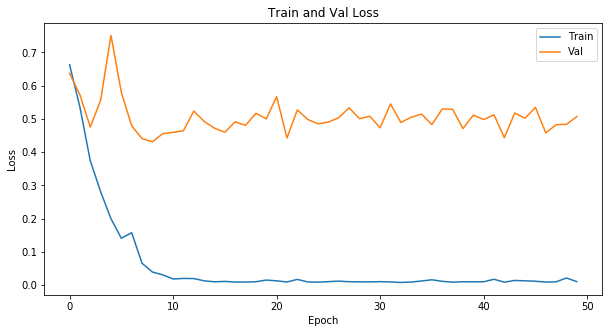

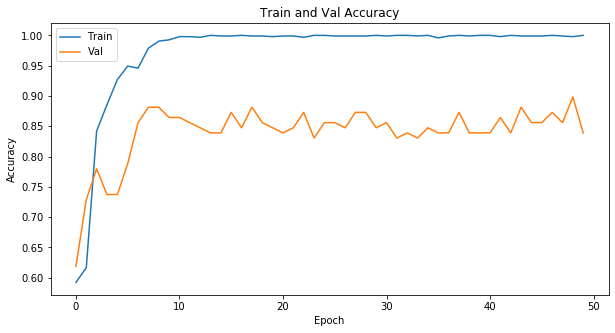

In [3]:
model = MultiCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
model = train_model(model, criterion, optimizer, exp_lr_scheduler, dataloaders, dataset_sizes,
                       num_epochs=50, batch_size = batch_size)